In [11]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import progressbar
import seaborn as sns
import matplotlib.patches as mpatches
data_class1 = np.load('./data_class2/data2_class1.npy')
data_class2 = np.load('./data_class2/data2_class2.npy')
data_test1   = np.load('./data_class2/data2_test1.npy')
data_test2   = np.load('./data_class2/data2_test2.npy')
data = []

In [12]:
def func_G(x,cov, mean,p=1/2):
    inv_cov = np.linalg.pinv(cov)
    g = -0.5*np.matmul(np.matmul((x-mean),(inv_cov)),((x-mean).T))+0.5*(np.log(np.linalg.det(cov)))+np.log(p)
    if(isinstance(g,np.ndarray)):
        return g.diagonal()
    else:
        return g

In [13]:
def find_mean(data):
    return [np.sum(data[:,0])/data.shape[0],np.sum(data[:,1])/data.shape[0]]

def find_covariance(data, mean):
    a = []
    varx = (np.sum(data[:,0]**2)/data.shape[0])-(mean[0]**2)
    vary = (np.sum(data[:,1]**2)/data.shape[0])-(mean[1]**2)
    varxy = (np.sum(data[:,0]*data[:,1])/data.shape[0])-(mean[0]*mean[1])
    a = [[varx,varxy],[varxy,vary]]
    a = np.array(a)
    
    return a

In [14]:
def get_confusion_mat(classes, il=None,jl=None):
    
    lis = []

    conf_mat = np.full((2,2),1e-10)
    for i in range(data_test1.shape[0]):
        lis.append(0)
    for i in range(data_test2.shape[0]):
        lis.append(1)
    for i in range(len(classes)):
        conf_mat[lis[i]][classes[i]]+=1

    return np.array(conf_mat)

In [15]:
def metric(conf_matrix):
    x = conf_matrix.shape[0]
    precision = []
    accuracy = []
    recall = []
    f_measure = []
    total_sum = np.sum(conf_matrix)
    for i in range(x):
        TP = conf_matrix[i][i]
        FN = np.sum(conf_matrix[i,:])-conf_matrix[i][i]
        FP = np.sum(conf_matrix[:,i])-conf_matrix[i][i]
        TN = total_sum-(TP+FP+FN)

        recal = TP/(TP+FN)
        preci = TP/(TP+FP)
        acc = (TP+TN)/(TP+TN+FP+FN)
        
        precision.append(preci)
        recall.append(recal)
        accuracy.append(acc)
        f_measure.append((2*recal*preci)/(recal+preci))
        
    return accuracy,precision,recall,f_measure

In [16]:
def find_range(data1, data2, test):
    
    minx = np.min(data1[:,0])
    minx = min(minx, np.min(data2[:,0]))
    
    
    miny = np.min(data1[:,1])
    miny = min(miny, np.min(data2[:,1]))
   
    
    maxx = np.max(data1[:,0])
    maxx = max(maxx, np.max(data2[:,0]))
    
    
    maxy = np.min(data1[:,1])
    maxy = max(maxy, np.max(data2[:,1]))
    
    scalex = maxx-minx
    scaley = maxy-miny
    return minx-5, miny-5, maxx+5, maxy+5

In [17]:
def pair_plot(data, dc1, dc2,cov1, cov2, mean1, mean2, il, jl):
    dat_blue = []
    dat_red = []
    dict_={1:'violet',2:'pink',3:'oldlace'}
    dict_2 = {3:'red',1:'blue',2:'green'}
    patch1 = mpatches.Patch(color=dict_[il], label='class{}'.format(il))
    patch2 = mpatches.Patch(color=dict_[jl], label='class{}'.format(jl))
    for i in (range(data.shape[0])):
        g1 = func_G(data[i],cov1,mean1)
        g2 = func_G(data[i],cov2,mean2)
        if(np.argmax([g1,g2])==0):
            dat_red.append([data[i][0],data[i][1]])
        elif(np.argmax([g1,g2])==1):
            dat_blue.append([data[i][0],data[i][1]])

    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    fig, ax = plt.subplots()
    ax = sns.kdeplot(dc1[:,0], dc1[:,1])
    ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c=dict_[jl])
    ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c=dict_[il])
    ax = plt.legend(handles=[patch2,patch1])
    ax = plt.scatter(dc1[:,0], dc1[:,1], s=2, c=dict_2[il])
    ax = plt.scatter(dc2[:,0], dc2[:,1], s=2, c=dict_2[jl])
    plt.show()
    
    data_test = []
    if(il==1 or jl==1):
        for i in range(data_test1.shape[0]):
            data_test.append([data_test1[i][0],data_test1[i][1]])
    if(il==2 or jl==2):
        for i in range(data_test2.shape[0]):
            data_test.append([data_test2[i][0],data_test2[i][1]])
    if(il==3 or jl==3):
        for i in range(data_test3.shape[0]):
            data_test.append([data_test3[i][0],data_test3[i][1]])
        
    data_test = np.array(data_test)
    g1 = func_G(data_test, cov1, mean1)
    g2 = func_G(data_test, cov2, mean2)


    classes = []
    for i in range(data_test.shape[0]):
        classes.append(np.argmax([g1[i],g2[i]]))

    conf_mat = get_confusion_mat(classes, il,jl)
    print("Confusion Matrix")
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))

In [18]:
data_test = []
for i in range(data_test1.shape[0]):
    data_test.append([data_test1[i][0],data_test1[i][1]])
for i in range(data_test2.shape[0]):
    data_test.append([data_test2[i][0],data_test2[i][1]])

data_test = np.array(data_test)
minx, miny, maxx,maxy = find_range(data_class1, data_class2, data_test) 
for i in np.arange(minx,maxx,1e-1):
    for j in np.arange(miny,maxy,1e-1):
        data.append([i,j])
data = np.array(data)

In [19]:
mean1 = find_mean(data_class1)
mean2 = find_mean(data_class2)

cov1 = find_covariance(data_class1, mean1)
cov2 = find_covariance(data_class2, mean2)

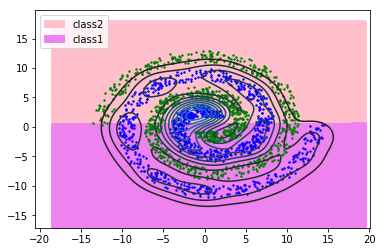

Confusion Matrix
[[ 188.  138.]
 [ 151.  175.]]
Accuracy:  [ 0.55674847  0.55674847]
Precision:  [ 0.55457227  0.55910543]
Recall:  [ 0.57668712  0.53680982]
F-Measure:  [ 0.56541353  0.54773083]
Mean F-Measure:  0.556572181628


In [20]:
#Case1: When all class have same diagonal covariance matrix

var_avg = (cov1[0][0]+cov2[0][0]+cov1[1][1]+cov2[1][1])/4
cov_new = [[var_avg,0],
           [0,var_avg]]

pair_plot(data, data_class1, data_class2, cov_new, cov_new, mean1, mean2,1,2)

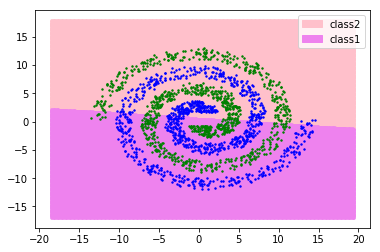

Confusion Matrix
[[ 188.  138.]
 [ 151.  175.]]
Accuracy:  [ 0.55674847  0.55674847]
Precision:  [ 0.55457227  0.55910543]
Recall:  [ 0.57668712  0.53680982]
F-Measure:  [ 0.56541353  0.54773083]
Mean F-Measure:  0.556572181628


In [64]:
#Case2: When all class have same covariance matrix

cov_new = np.add(cov1,cov2)/2

pair_plot(data, data_class1, data_class2, cov_new, cov_new, mean1, mean2,1,2)

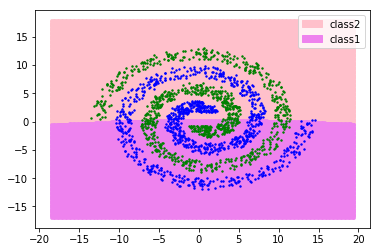

Confusion Matrix
[[ 180.  146.]
 [ 144.  182.]]
Accuracy:  [ 0.55521472  0.55521472]
Precision:  [ 0.55555556  0.55487805]
Recall:  [ 0.55214724  0.55828221]
F-Measure:  [ 0.55384615  0.55657492]
Mean F-Measure:  0.555210538697


In [65]:
#Case3: When all class have different covariance matrix but diagonal
cov1_new = np.copy(cov1)
cov2_new = np.copy(cov2)

cov1_new[0][1]=0
cov1_new[1][0]=0
cov2_new[0][1]=0
cov2_new[1][0]=0



pair_plot(data, data_class1, data_class2, cov1_new, cov2_new, mean1, mean2,1,2)

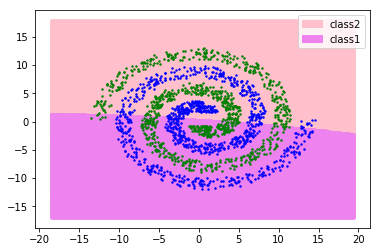

Confusion Matrix
[[ 181.  145.]
 [ 145.  181.]]
Accuracy:  [ 0.55521472  0.55521472]
Precision:  [ 0.55521472  0.55521472]
Recall:  [ 0.55521472  0.55521472]
F-Measure:  [ 0.55521472  0.55521472]
Mean F-Measure:  0.555214723926


In [66]:
#Case4: When all class have different covariance matrix

pair_plot(data, data_class1, data_class2, cov1, cov2, mean1, mean2,1,2)